# Base Titanic - disponível em https://www.kaggle.com/datasets



# Regressão Logística


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

In [2]:
df = pd.read_csv('titanic.csv', sep=',', decimal='.')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#percentual de sobreviventes na base original
(df.Survived.value_counts() / df.shape[0]) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [6]:
#Regressão Logistica de acordo com as varíaveis: idade do passageiro, a classe em que a pessoa viajava e o sexo.
# Transforma classe em categorico
df['Pclass'] = df['Pclass'].astype('category')

In [7]:
reg = smf.glm(formula='Survived ~ Age + Pclass + Sex', data=df,
                family = sm.families.Binomial()).fit()
print(reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Sun, 02 Aug 2020   Deviance:                       647.28
Time:                        19:51:09   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7770      0.401      9.416      

In [8]:
(np.exp(reg.params[1:]) - 1) * 100

Pclass[T.2]   -73.012578
Pclass[T.3]   -92.427336
Sex[T.male]   -91.976383
Age            -3.630967
dtype: float64

In [9]:
#modelo sklearn
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = df[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
y = baseline_df.Survived
X = pd.get_dummies(baseline_df[['Pclass', 'Sex', 'Age']], drop_first=True)
print(X)

      Age  Pclass_2  Pclass_3  Sex_male
0    22.0         0         1         1
1    38.0         0         0         0
2    26.0         0         1         0
3    35.0         0         0         0
4    35.0         0         1         1
..    ...       ...       ...       ...
885  39.0         0         1         0
886  27.0         1         0         1
887  19.0         0         0         0
889  26.0         0         0         1
890  32.0         0         1         1

[714 rows x 4 columns]


In [10]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#mesmos coeficientes do modelo anterior
print(model.coef_)

[[-0.03698519 -1.30979451 -2.58062095 -2.52277985]]


In [12]:
yhat = model.predict_proba(X)

In [13]:
yhat = yhat[:, 1]

In [14]:
#matriz de confusão
confusion_matrix(y, model.predict(X))

array([[356,  68],
       [ 83, 207]], dtype=int64)

In [15]:
pd.crosstab(y, model.predict(X))

col_0,0,1
Survived,,
0,356,68
1,83,207


In [16]:
#verificando acurácia do modelo
acuracia = accuracy_score(y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.7885 de acurácia.


In [17]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       424
           1       0.75      0.71      0.73       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



In [18]:
print('AUC: %0.2f' % roc_auc_score(y, yhat))

AUC: 0.85


In [19]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

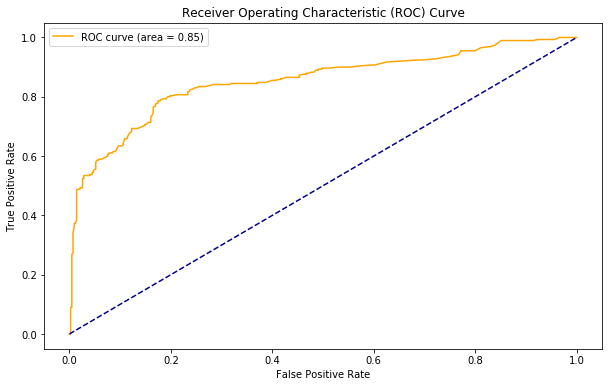

In [20]:
plot_roc_curve(y, yhat)

# Redes Neurais


In [21]:
import os
import itertools

In [22]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
Dados_Treino = pd.read_csv("train.csv")
Dados_Teste = pd.read_csv("test.csv")

In [24]:
colunas2 = list(Dados_Treino)
print("Variáveis.:")
print(colunas2)
print(Dados_Treino.head())

Variáveis.:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9

In [25]:
#Normalização dos dados de treino
Dados_Treino['Age'] = Dados_Treino['Age'].fillna(Dados_Treino['Age'].median())


In [26]:
#Transformando os valores da coluna sexo de string para inteiro
codificador_rotulos = preprocessing.LabelEncoder()
sexo_cod_treino = codificador_rotulos.fit_transform(Dados_Treino["Sex"])

In [27]:
#Declara um modelo de Rede Neural Multi-Camada
#RNA = MLPClassifier(hidden_layer_sizes=(4,))
RNA = MLPClassifier()

In [28]:
#Criando um dataframe para treinar o modelo somente com as colunas escolhidas 
Variaveis_Treino = pd.DataFrame(Dados_Treino, columns=['Pclass','Age'])
Variaveis_Treino['Sexo'] = sexo_cod_treino



In [29]:
print("Amostra do novo DataFrame de Treino.: ")
print(Variaveis_Treino.head())


Amostra do novo DataFrame de Treino.: 
   Pclass   Age  Sexo
0       3  22.0     1
1       1  38.0     0
2       3  26.0     0
3       1  35.0     0
4       3  35.0     1


In [30]:
#Treinando o modelo RNA com os dados de treino para que ele descubra ligações
#dos dados de treino com o rótulo de sobreviver
RNA.fit(X=Variaveis_Treino,
        y=Dados_Treino["Survived"])

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [31]:
#capacidade de acerto do modelo treinado
print("Score do Treino.: ")
print(RNA.score(X=Variaveis_Treino,
        y=Dados_Treino["Survived"]))

Score do Treino.: 
0.7991021324354658


In [32]:
#Normalizando os dados de teste
#Quando a idade não foi informada (Null), passará a idade média dos dados
Dados_Teste["Age"] = Dados_Teste['Age'].fillna(Dados_Teste['Age'].median()) 


In [33]:
#Transformando os valores da coluna sexo de string para inteiro
sexo_cod_teste = codificador_rotulos.fit_transform(Dados_Teste["Sex"])

In [34]:
#Criando um dataframe de teste somente com as colunas escolhidas
variaveis_teste = pd.DataFrame(Dados_Teste, columns=['Pclass','Age'])
variaveis_teste['Sexo'] = sexo_cod_teste

In [35]:
#Normalizando os dados de treino e de teste na mesma escala com z-score
print("Normalizando os dados para que fiquem na mesma escala:")
colunas = list(Variaveis_Treino)
scaler = preprocessing.StandardScaler().fit(Variaveis_Treino)

Normalizando os dados para que fiquem na mesma escala:


In [36]:
Variaveis_Treino = pd.DataFrame(scaler.transform(Variaveis_Treino), columns=colunas)
variaveis_teste = pd.DataFrame(scaler.transform(variaveis_teste), columns=colunas)

In [37]:
print("Amostra do novo DataFrame de Teste.: ")
print(variaveis_teste.head())

Amostra do novo DataFrame de Teste.: 
     Pclass       Age      Sexo
0  0.827377  0.394887  0.737695
1  0.827377  1.355510 -1.355574
2 -0.369365  2.508257  0.737695
3  0.827377 -0.181487  0.737695
4  0.827377 -0.565736 -1.355574


In [38]:
rotulos_teste = pd.read_csv("gender_submission.csv")
rotulos_teste = rotulos_teste["Survived"]


In [39]:
#Utiliza o modelo RNA declarado e treinado para efetuar predições com os dados de teste 
predicoes = RNA.predict(variaveis_teste)

In [40]:
#Utiliza uma função para contabilizar a acurácia
accuracy = accuracy_score(rotulos_teste, predicoes)
accuracy

0.36363636363636365

[[  0 266]
 [  0 152]]
Resultado dos dados de Teste.: 
0.36363636363636365


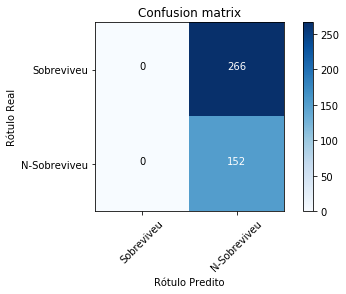

In [41]:
#matriz de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    
    plt.ylabel('Rótulo Real')
    plt.xlabel('Rótulo Predito')

cnf_matrix = confusion_matrix(rotulos_teste, predicoes)
np.set_printoptions(precision=2)

# Plotando a matriz de confusão
class_names = ['Sobreviveu', 'N-Sobreviveu']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

print("Resultado dos dados de Teste.: ")
print(accuracy)

# SVM


In [42]:
ds = pd.read_csv('train.csv')

In [43]:
# Preencha os valores ausentes com a mediana de Mr, Mrs, etc.
noage = ds[ ds['Age'].isna() ]
honorifics = ['Mr', 'Mrs', 'Ms', 'Miss', 'Master', 'Rev', 'Dr']
for h in honorifics:
    regexp = fr".*\b{h}\..*"
    tn1 = ds[ ds['Name'].str.match(regexp) ]
    median = tn1['Age'].median()
    #print(f"{h}: {len(tn1)}, {median}")
    hoe = noage[ noage['Name'].str.match(regexp) ]
    ds['Age'] = ds['Age'].fillna( hoe['Age'].fillna(median) )

In [44]:
ds['Sex'] = pd.get_dummies(ds['Sex'])['female'].values
X = ds.loc[:, ['Sex', 'Age', 'Pclass']]
y = ds.loc[:, ['Survived']]

In [45]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [47]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc.score(X_test, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7932960893854749

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

